In [1]:
## uncomment these if you upload this on google drive and mount the drive
from google.colab import drive
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/188CV_Homework4/

/content/gdrive/MyDrive/188CV_Homework4


In [3]:
# torch.cuda.get_device_name()

#### Q1. Loading Data 

Run the below cell to load CIFAR-10 train and test data. 
Answer the corresponding questions in the overleaf document

In [4]:
## Define transforms to apply on images
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

## defining training and test data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

\
## creating data loaders
batch_size = 4 ## set the batch size value 
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

train_data_sample, train_labels_sample = next(iter(train_loader))
test_data_sample, test_labels_sample = next(iter(test_loader))
print(train_labels_sample.shape)
print(test_data_sample.shape)

## image labels in cifar 10
class_labels = classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
torch.Size([4])
torch.Size([4, 3, 32, 32])


### Helper function 
To display images in the training set

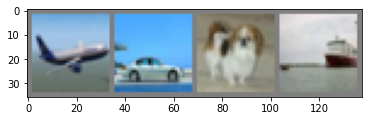

plane   car   dog  ship


In [5]:
# function to display images in the training set 
def display(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


## displaying images in 1 batch of the training set

# get 1 batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
display(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join('%5s' % class_labels[labels[j]] for j in range(4)))


### Q2. Classifier Architecture 

In [6]:
## Defining Classifier architecture 

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Q3. Training the network

(i) Training on CPU 

In [7]:
### Copy the code from (i), and modify it to run on GPUs for 20 epochs

### Complete the code in the training box 

## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
net = Net()

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Defining Training Parameters

num_epochs = 3 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below 
epoch_loss_list = []
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs
        labels = labels

        optimizer.zero_grad()
        outputs = net(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
    epoch_loss = running_loss / len(train_loader)
    epoch_loss_list.append(epoch_loss)
            
print('Training Complete')
PATH = './Models/net_cpu_4_3.pth'
torch.save(net.state_dict(), PATH)

[1, 250] loss: 2.304
[1, 500] loss: 4.603
[1, 750] loss: 6.901
[1, 1000] loss: 9.192
[1, 1250] loss: 11.459
[1, 1500] loss: 13.662
[1, 1750] loss: 15.757
[1, 2000] loss: 17.793
[1, 2250] loss: 19.777
[1, 2500] loss: 21.726
[1, 2750] loss: 23.677
[1, 3000] loss: 25.539
[1, 3250] loss: 27.381
[1, 3500] loss: 29.168
[1, 3750] loss: 30.920
[1, 4000] loss: 32.681
[1, 4250] loss: 34.392
[1, 4500] loss: 36.110
[1, 4750] loss: 37.798
[1, 5000] loss: 39.482
[1, 5250] loss: 41.119
[1, 5500] loss: 42.789
[1, 5750] loss: 44.486
[1, 6000] loss: 46.134
[1, 6250] loss: 47.705
[1, 6500] loss: 49.304
[1, 6750] loss: 50.854
[1, 7000] loss: 52.409
[1, 7250] loss: 53.932
[1, 7500] loss: 55.459
[1, 7750] loss: 56.990
[1, 8000] loss: 58.502
[1, 8250] loss: 60.041
[1, 8500] loss: 61.531
[1, 8750] loss: 63.025
[1, 9000] loss: 64.556
[1, 9250] loss: 66.066
[1, 9500] loss: 67.535
[1, 9750] loss: 69.014
[1, 10000] loss: 70.419
[1, 10250] loss: 71.890
[1, 10500] loss: 73.333
[1, 10750] loss: 74.764
[1, 11000] los

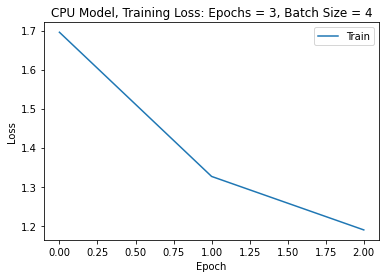

In [9]:
## complete the code to plot the running loss per 250 mini batches curve

def plot_loss_curve(running_loss_list, title):
  ## complete code 
  plt.title("CPU Model, Training Loss: " + title)
  plt.plot(np.array(running_loss_list), label = "Train")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.savefig("./Curves/net_cpu_4_3.png")
  plt.show()

plot_loss_curve(epoch_loss_list, title = "Epochs = 3, Batch Size = 4")

(ii) Paste the above code in the code block below and modify it to use GPUs for training 


In [10]:
### Copy the code from (i), and modify it to run on GPUs for 20 epochs

### Complete the code in the training box 

## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
net = Net().cuda()

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Defining Training Parameters

num_epochs = 20 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below 
epoch_loss_list = []
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()

        optimizer.zero_grad()
        outputs = net(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.cpu().item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
    epoch_loss = running_loss / len(train_loader)
    epoch_loss_list.append(epoch_loss)
            
print('Training Complete')
PATH = './Models/net_gpu_4_20.pth'
torch.save(net.state_dict(), PATH)

## complete the code to plot the running loss per 250 mini batches curve


[1, 250] loss: 2.304
[1, 500] loss: 4.603
[1, 750] loss: 6.901
[1, 1000] loss: 9.192
[1, 1250] loss: 11.459
[1, 1500] loss: 13.662
[1, 1750] loss: 15.757
[1, 2000] loss: 17.794
[1, 2250] loss: 19.779
[1, 2500] loss: 21.726
[1, 2750] loss: 23.677
[1, 3000] loss: 25.540
[1, 3250] loss: 27.382
[1, 3500] loss: 29.173
[1, 3750] loss: 30.925
[1, 4000] loss: 32.687
[1, 4250] loss: 34.397
[1, 4500] loss: 36.114
[1, 4750] loss: 37.801
[1, 5000] loss: 39.486
[1, 5250] loss: 41.118
[1, 5500] loss: 42.785
[1, 5750] loss: 44.485
[1, 6000] loss: 46.137
[1, 6250] loss: 47.709
[1, 6500] loss: 49.311
[1, 6750] loss: 50.864
[1, 7000] loss: 52.426
[1, 7250] loss: 53.943
[1, 7500] loss: 55.466
[1, 7750] loss: 56.996
[1, 8000] loss: 58.505
[1, 8250] loss: 60.049
[1, 8500] loss: 61.537
[1, 8750] loss: 63.029
[1, 9000] loss: 64.562
[1, 9250] loss: 66.069
[1, 9500] loss: 67.554
[1, 9750] loss: 69.036
[1, 10000] loss: 70.451
[1, 10250] loss: 71.922
[1, 10500] loss: 73.375
[1, 10750] loss: 74.802
[1, 11000] los

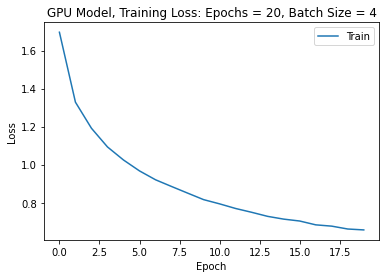

In [11]:
def plot_loss_curve(running_loss_list, title):
  ## complete code 
  plt.figure()
  plt.title("GPU Model, Training Loss: " + title)
  plt.plot(np.array(running_loss_list),  label = "Train")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.savefig("./Curves/net_4_20.png")
  plt.show()
plot_loss_curve(epoch_loss_list, title = "Epochs = 20, Batch Size = 4")

### Testing the network

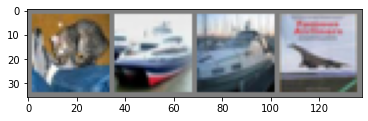

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship plane plane


In [12]:
## displaying images from test set 
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
display(torchvision.utils.make_grid(images[0:4]))
print('GroundTruth: ', ' '.join('%5s' % class_labels[labels[j]] for j in range(4)))

## Instantiating network and loading the trained model
net = Net()
net.load_state_dict(torch.load("./Models/net_gpu_4_20.pth"))

## Getting predicted label/class from the model output 
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_labels[predicted[j]] for j in range(4)))

(iv) Complete the code below to test the network on the entire testing set. 

In [13]:

### Accuracy on whole data set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
acc  = correct / total * 100
print('Accuracy of the network trained on gpu for 20 epochs with batch size 4 on the 10000 test images: %d %%' % (acc))

Accuracy of the network trained on gpu for 20 epochs with batch size 4 on the 10000 test images: 61 %


(v) Convert the training code in part (iii) and testing code in part (iv) to define functions `train` and  `test` with function definitions as shown below. Train the network with different batch size and number of epochs. Use the `plot_loss_curve` function you defined in (i) above to plot the loss curves. Use the defined `train` and `test` functions to train the network for various configurations asked in (v) in the problem set. 

In [14]:
def train(train_loader=train_loader, num_epochs=2, use_gpu=False, lr=0.001, momentum=0.9, model_save_path='./net.pth'):
    """
    INPUTS 
    num_epochs: number of training epochs
    use_gpu: False by default. If true, load the model and data to GPU for training
    lr: learning rate for SGD optimizer
    momentum: momentum for SGD optimizer
    model_save_path: save path for the trained model 

    OUTPUTS
    returns running_loss_list: which stores the loss averaged over a minibatch of size 250
    """
    torch.manual_seed(7)
    np.random.seed(7)    
    device = torch.device("cuda:0" if use_gpu == True else "cpu")

    ## Instantiating classifier
    net = Net().to(device)

    ## Defining optimizer and loss function
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

    ## Defining Training Parameters
    epoch_loss_list = []
    running_loss_list = [] # list to store running loss in the code below 
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = net(inputs)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.cpu().item()
            if i % 250 == 249:    # print every 250 mini-batches
                print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
                running_loss_list.append(running_loss)
        epoch_loss = running_loss / len(train_loader)
        epoch_loss_list.append(epoch_loss)
                
    print('Training Complete')
    PATH = model_save_path
    torch.save(net.state_dict(), PATH) 
    return epoch_loss_list

def test(test_loader=test_loader, model_path='./net.pth'):
  ### complete the code to compute accuracy and store it as the variable acc 
    correct = 0
    total = 0

    net = Net()
    net.load_state_dict(torch.load(model_path))

    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc  = correct / total * 100
    print('Accuracy of the network on the 10000 test images: %d %%' % (acc))

def plot_loss_curve(epoch_loss_list, name, title):
  ## complete code 
  plt.title("GPU Model, Training Loss: " + title)
  plt.plot(np.array(epoch_loss_list),  label = "Train")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend()
  plt.savefig("./Curves/" + name + ".png")
  plt.show()

BATCH SIZE = 4

In [15]:
epoch_loss_list = train(train_loader=train_loader, num_epochs=5, use_gpu=True, lr=0.001, momentum=0.9, model_save_path='./Models.net_4_5.pth')

[1, 250] loss: 2.304
[1, 500] loss: 4.603
[1, 750] loss: 6.901
[1, 1000] loss: 9.192
[1, 1250] loss: 11.459
[1, 1500] loss: 13.662
[1, 1750] loss: 15.758
[1, 2000] loss: 17.795
[1, 2250] loss: 19.781
[1, 2500] loss: 21.730
[1, 2750] loss: 23.681
[1, 3000] loss: 25.544
[1, 3250] loss: 27.386
[1, 3500] loss: 29.175
[1, 3750] loss: 30.924
[1, 4000] loss: 32.685
[1, 4250] loss: 34.401
[1, 4500] loss: 36.116
[1, 4750] loss: 37.805
[1, 5000] loss: 39.486
[1, 5250] loss: 41.119
[1, 5500] loss: 42.785
[1, 5750] loss: 44.483
[1, 6000] loss: 46.132
[1, 6250] loss: 47.702
[1, 6500] loss: 49.304
[1, 6750] loss: 50.855
[1, 7000] loss: 52.414
[1, 7250] loss: 53.938
[1, 7500] loss: 55.462
[1, 7750] loss: 56.995
[1, 8000] loss: 58.506
[1, 8250] loss: 60.040
[1, 8500] loss: 61.531
[1, 8750] loss: 63.024
[1, 9000] loss: 64.562
[1, 9250] loss: 66.072
[1, 9500] loss: 67.550
[1, 9750] loss: 69.034
[1, 10000] loss: 70.439
[1, 10250] loss: 71.915
[1, 10500] loss: 73.360
[1, 10750] loss: 74.787
[1, 11000] los

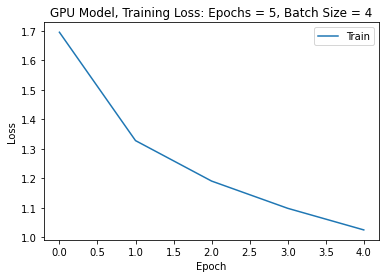

In [17]:
plot_loss_curve(epoch_loss_list, name = "net_4_5", title = "Epochs = 5, Batch Size = 4")

In [19]:
test(test_loader=test_loader, model_path='./Models/net_4_5.pth')

Accuracy of the network on the 10000 test images: 60 %


In [20]:
epoch_loss_list = train(train_loader=train_loader, num_epochs=20, use_gpu=True, lr=0.001, momentum=0.9, model_save_path='./Models/net_4_20.pth')

[1, 250] loss: 2.304
[1, 500] loss: 4.603
[1, 750] loss: 6.901
[1, 1000] loss: 9.192
[1, 1250] loss: 11.459
[1, 1500] loss: 13.662
[1, 1750] loss: 15.757
[1, 2000] loss: 17.795
[1, 2250] loss: 19.778
[1, 2500] loss: 21.726
[1, 2750] loss: 23.678
[1, 3000] loss: 25.538
[1, 3250] loss: 27.380
[1, 3500] loss: 29.167
[1, 3750] loss: 30.917
[1, 4000] loss: 32.678
[1, 4250] loss: 34.388
[1, 4500] loss: 36.108
[1, 4750] loss: 37.796
[1, 5000] loss: 39.479
[1, 5250] loss: 41.114
[1, 5500] loss: 42.784
[1, 5750] loss: 44.482
[1, 6000] loss: 46.132
[1, 6250] loss: 47.704
[1, 6500] loss: 49.311
[1, 6750] loss: 50.863
[1, 7000] loss: 52.427
[1, 7250] loss: 53.948
[1, 7500] loss: 55.473
[1, 7750] loss: 57.002
[1, 8000] loss: 58.518
[1, 8250] loss: 60.053
[1, 8500] loss: 61.541
[1, 8750] loss: 63.029
[1, 9000] loss: 64.559
[1, 9250] loss: 66.068
[1, 9500] loss: 67.544
[1, 9750] loss: 69.023
[1, 10000] loss: 70.427
[1, 10250] loss: 71.900
[1, 10500] loss: 73.346
[1, 10750] loss: 74.777
[1, 11000] los

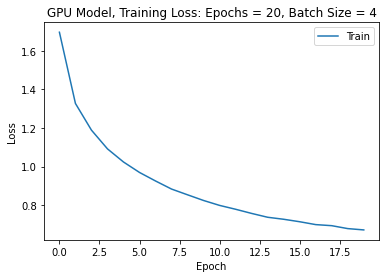

In [21]:
plot_loss_curve(epoch_loss_list, name = "net_4_20", title = "Epochs = 20, Batch Size = 4")

In [22]:
test(test_loader=test_loader, model_path='./Models/net_4_20.pth')

Accuracy of the network on the 10000 test images: 60 %


BATCH SIZE = 16


In [23]:
batch_size = 16 ## set the batch size value 
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

In [24]:
print(train_loader)
train_data, train_labels = next(iter(train_loader))
test_data, test_labels = next(iter(test_loader))
print(train_labels.shape)
print(test_data.shape)

torch.Size([16])
torch.Size([16, 3, 32, 32])


In [25]:
epoch_loss_list = train(train_loader=train_loader, num_epochs=5, use_gpu=True, lr=0.001, momentum=0.9, model_save_path='./Models/net_16_5.pth')

[1, 250] loss: 2.303
[1, 500] loss: 4.602
[1, 750] loss: 6.900
[1, 1000] loss: 9.186
[1, 1250] loss: 11.438
[1, 1500] loss: 13.587
[1, 1750] loss: 15.606
[1, 2000] loss: 17.564
[1, 2250] loss: 19.461
[1, 2500] loss: 21.298
[1, 2750] loss: 23.085
[1, 3000] loss: 24.811
[2, 250] loss: 1.692
[2, 500] loss: 3.346
[2, 750] loss: 4.985
[2, 1000] loss: 6.578
[2, 1250] loss: 8.159
[2, 1500] loss: 9.697
[2, 1750] loss: 11.238
[2, 2000] loss: 12.784
[2, 2250] loss: 14.316
[2, 2500] loss: 15.830
[2, 2750] loss: 17.310
[2, 3000] loss: 18.797
[3, 250] loss: 1.447
[3, 500] loss: 2.897
[3, 750] loss: 4.345
[3, 1000] loss: 5.747
[3, 1250] loss: 7.158
[3, 1500] loss: 8.541
[3, 1750] loss: 9.917
[3, 2000] loss: 11.311
[3, 2250] loss: 12.678
[3, 2500] loss: 14.063
[3, 2750] loss: 15.413
[3, 3000] loss: 16.760
[4, 250] loss: 1.311
[4, 500] loss: 2.615
[4, 750] loss: 3.928
[4, 1000] loss: 5.273
[4, 1250] loss: 6.558
[4, 1500] loss: 7.850
[4, 1750] loss: 9.126
[4, 2000] loss: 10.396
[4, 2250] loss: 11.649
[

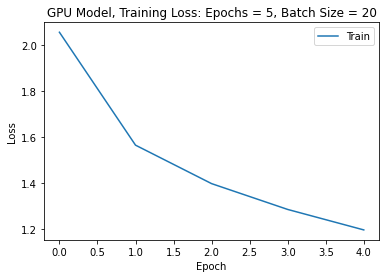

In [26]:
plot_loss_curve(epoch_loss_list, name = "net_16_5", title = "Epochs = 5, Batch Size = 20")

In [27]:
test(test_loader=test_loader, model_path='./Models/net_16_5.pth')

Accuracy of the network on the 10000 test images: 57 %


In [28]:
epoch_loss_list = train(train_loader=train_loader, num_epochs=20, use_gpu=True, lr=0.001, momentum=0.9, model_save_path='./Models/net_16_20.pth')

[1, 250] loss: 2.303
[1, 500] loss: 4.602
[1, 750] loss: 6.900
[1, 1000] loss: 9.186
[1, 1250] loss: 11.438
[1, 1500] loss: 13.588
[1, 1750] loss: 15.607
[1, 2000] loss: 17.565
[1, 2250] loss: 19.461
[1, 2500] loss: 21.299
[1, 2750] loss: 23.086
[1, 3000] loss: 24.812
[2, 250] loss: 1.693
[2, 500] loss: 3.348
[2, 750] loss: 4.987
[2, 1000] loss: 6.581
[2, 1250] loss: 8.163
[2, 1500] loss: 9.700
[2, 1750] loss: 11.242
[2, 2000] loss: 12.787
[2, 2250] loss: 14.320
[2, 2500] loss: 15.834
[2, 2750] loss: 17.315
[2, 3000] loss: 18.801
[3, 250] loss: 1.447
[3, 500] loss: 2.897
[3, 750] loss: 4.347
[3, 1000] loss: 5.749
[3, 1250] loss: 7.158
[3, 1500] loss: 8.540
[3, 1750] loss: 9.918
[3, 2000] loss: 11.312
[3, 2250] loss: 12.681
[3, 2500] loss: 14.065
[3, 2750] loss: 15.412
[3, 3000] loss: 16.758
[4, 250] loss: 1.310
[4, 500] loss: 2.617
[4, 750] loss: 3.932
[4, 1000] loss: 5.277
[4, 1250] loss: 6.561
[4, 1500] loss: 7.854
[4, 1750] loss: 9.129
[4, 2000] loss: 10.402
[4, 2250] loss: 11.659
[

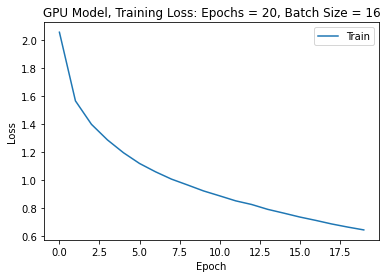

In [29]:
plot_loss_curve(epoch_loss_list, name = "net_16_20", title = "Epochs = 20, Batch Size = 16")

In [30]:
test(test_loader=test_loader, model_path='./Models/net_16_20.pth')

Accuracy of the network on the 10000 test images: 65 %
